# Spotify Machine Learning

In [1]:
# Libraries

%matplotlib inline

import json

import pandas as pd
from pandas.io.json import json_normalize

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Neural Network
from sklearn.neural_network import MLPRegressor

In [2]:
# Import JSON files

with open("top_tracks_attributes.json") as f:
    top_tracks_json = json.load(f)
    
with open("pop_tracks_attributes.json") as f:
    genre_tracks_json = json.load(f)
    
# with open
    
top_tracks = json_normalize(top_tracks_json)
top_tracks['rank'] = range(1, len(top_tracks) + 1)
top_tracks['rank'] = top_tracks['rank'] / len(top_tracks)

genre_tracks = json_normalize(genre_tracks_json)

## Characteristics to Analyze

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. valence

Predicting: rank

Assume all attributes of are equal weight initially.

In [3]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [4]:
train

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
9,0.004740,https://api.spotify.com/v1/audio-analysis/5EYd...,0.841,260507,0.7410,5EYdTPdJD74r9EVZBztqGG,0.012100,0,0.0911,-6.222,0,0.0392,122.984,4,https://api.spotify.com/v1/tracks/5EYdTPdJD74r...,audio_features,spotify:track:5EYdTPdJD74r9EVZBztqGG,0.9700,0.10
33,0.000616,https://api.spotify.com/v1/audio-analysis/0hfB...,0.461,171053,0.8690,0hfByzDRgR10HDLqm89lA9,0.000008,1,0.2500,-4.672,0,0.0731,145.919,4,https://api.spotify.com/v1/tracks/0hfByzDRgR10...,audio_features,spotify:track:0hfByzDRgR10HDLqm89lA9,0.6490,0.34
71,0.000506,https://api.spotify.com/v1/audio-analysis/6VNR...,0.603,260181,0.8200,6VNRBXV7lQz9VAHhsfYkrE,0.000002,4,0.1300,-6.145,0,0.0510,103.907,4,https://api.spotify.com/v1/tracks/6VNRBXV7lQz9...,audio_features,spotify:track:6VNRBXV7lQz9VAHhsfYkrE,0.4080,0.72
4,0.249000,https://api.spotify.com/v1/audio-analysis/0NdT...,0.728,193030,0.6380,0NdTUS4UiNYCNn5FgVqKQY,0.000000,5,0.1160,-6.455,0,0.0336,130.014,4,https://api.spotify.com/v1/tracks/0NdTUS4UiNYC...,audio_features,spotify:track:0NdTUS4UiNYCNn5FgVqKQY,0.8720,0.05
80,0.000386,https://api.spotify.com/v1/audio-analysis/5YXr...,0.493,258066,0.9590,5YXr4AGfUQpLSxtFSsKUh6,0.118000,8,0.2540,-3.613,1,0.0414,125.040,4,https://api.spotify.com/v1/tracks/5YXr4AGfUQpL...,audio_features,spotify:track:5YXr4AGfUQpLSxtFSsKUh6,0.7030,0.81
16,0.221000,https://api.spotify.com/v1/audio-analysis/7F02...,0.588,278441,0.3010,7F02x6EKYIQV3VcTaTm7oN,0.002360,0,0.1280,-14.979,1,0.0294,112.458,4,https://api.spotify.com/v1/tracks/7F02x6EKYIQV...,audio_features,spotify:track:7F02x6EKYIQV3VcTaTm7oN,0.1900,0.17
58,0.000049,https://api.spotify.com/v1/audio-analysis/0W9X...,0.328,233987,0.9390,0W9Xvd4Qx1aZPxEi94vgRY,0.006500,2,0.3370,-1.654,0,0.0423,185.971,4,https://api.spotify.com/v1/tracks/0W9Xvd4Qx1aZ...,audio_features,spotify:track:0W9Xvd4Qx1aZPxEi94vgRY,0.3290,0.59
88,0.000760,https://api.spotify.com/v1/audio-analysis/1jJc...,0.451,302840,0.9310,1jJci4qxiYcOHhQR247rEU,0.004900,9,0.3610,-3.871,1,0.0719,122.961,4,https://api.spotify.com/v1/tracks/1jJci4qxiYcO...,audio_features,spotify:track:1jJci4qxiYcOHhQR247rEU,0.1720,0.89
31,0.348000,https://api.spotify.com/v1/audio-analysis/5H6J...,0.499,200733,0.4950,5H6Jp0syB5yEPk7SWYdlmk,0.028600,5,0.2000,-10.508,1,0.0501,80.086,4,https://api.spotify.com/v1/tracks/5H6Jp0syB5yE...,audio_features,spotify:track:5H6Jp0syB5yEPk7SWYdlmk,0.3390,0.32
22,0.048300,https://api.spotify.com/v1/audio-analysis/086m...,0.691,161124,0.6310,086myS9r57YsLbJpU0TgK9,0.000011,2,0.1040,-6.478,1,0.0368,92.004,4,https://api.spotify.com/v1/tracks/086myS9r57Ys...,audio_features,spotify:track:086myS9r57YsLbJpU0TgK9,0.8000,0.23


In [5]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

## Find Optimal K-Value

In [6]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [7]:
ks = pd.Series(range(1, 30, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

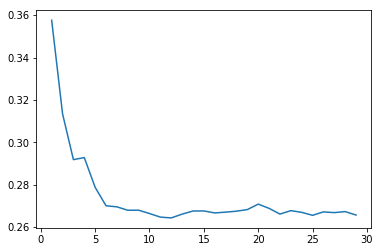

In [8]:
k_cross_val.plot()
k = k_cross_val.idxmin()

## K-nearest Neighbors Analysis

In [9]:
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors= k)
pipeline = Pipeline([('transform', scaler), ('fit', model)])
np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

0.26426711746829196

In [10]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred

array([0.44666667, 0.6175    , 0.3425    , 0.57916667, 0.52916667,
       0.66833333, 0.6225    , 0.55083333, 0.63916667, 0.65833333,
       0.44666667, 0.63333333, 0.63416667, 0.65833333, 0.64333333,
       0.57416667, 0.65083333, 0.4825    , 0.62916667, 0.645     ])

In [11]:
genre_test = genre_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]

In [12]:
ranked_indices = genre_test.join(pd.Series(model.predict(genre_test) * len(genre_tracks)).rename("predicted_rank")).sort_values("predicted_rank")

In [13]:
genre_tracks.loc[ranked_indices.index.tolist(), 'id'].tolist()

['7wC5eZcFS1Q1BsQ35DU6H4',
 '4h0zU3O9R5xzuTmNO7dNDU',
 '4S7YHmlWwfwArgd8LfSPud',
 '7wvwXi9Z66dcH5t202vVkN',
 '1tT55K6VEyO6XFDxK4lDQe',
 '4eSGSqP2TZvvX0kadZZttM',
 '047fCsbO4NdmwCBn8pcUXl',
 '7vRriwrloYVaoAe3a9wJHe',
 '04sN26COy28wTXYj3dMoiZ',
 '0utlOiJy2weVl9WTkcEWHy',
 '2VlLbhGLVJgdOW7kKdWWFc',
 '7tGEAA1f8MydT7eVbbO9Zy',
 '16qYlQ6koFxYVbiJbGHblz',
 '6I6NX6tjGsxFAsIfGzY9lJ',
 '5mCPDVBb16L4XQwDdbRUpz',
 '152lZdxL1OR0ZMW6KquMif',
 '5JB6aAEqAWZG7MLkbyYUs5',
 '6fFTPGGItuEpjwXRUIr4rk',
 '6lzLjIOyWTyTJvk0jraYee',
 '1Jl21sidRpEdlVBvYbssLx',
 '29H8RkqW9GaFy8tdjriuX3',
 '2JvzF1RMd7lE3KmFlsyZD8',
 '18uwL0vNUanqZH0ro2QcOP',
 '6G8kHiVZ1jW7vHMPVRNZU0',
 '7oOOI85fVQvVnK5ynNMdW7',
 '7bdYxWPCs46dQ0XLwySOyv',
 '5aqu5xhPqoOWqF71PkfgM8',
 '2QZ7WLBE8h2y1Y5Fb8RYbH',
 '43PuMrRfbyyuz4QpZ3oAwN',
 '3kxfsdsCpFgN412fpnW85Y',
 '2OpBganfGk2GVdSlRdxzaX',
 '1wZqJM5FGDEl3FjHDxDyQd',
 '6n3HGiq4v35D6eFOSwqYuo',
 '6vsV4D8BM6PioRr1UOx0n2',
 '0XOnMqLQDO89iAg7dWWwnG',
 '6NFyWDv5CjfwuzoCkw47Xf',
 '76tGvMdmFKuiMew33ZNNA9',
 

In [14]:
ranked_indices.loc[:, 'predicted_rank']

80     290.833333
504    290.833333
688    290.833333
930    290.833333
176    290.833333
907    298.333333
641    298.333333
161    330.000000
342    330.000000
379    330.000000
237    337.500000
141    340.000000
305    371.666667
710    375.000000
253    375.000000
62     375.000000
66     376.666667
217    378.333333
312    388.333333
416    388.333333
147    388.333333
6      388.333333
607    388.333333
214    388.333333
928    388.333333
812    388.333333
892    388.333333
81     392.500000
152    392.500000
316    404.166667
          ...    
400    720.833333
989    720.833333
212    720.833333
304    720.833333
195    720.833333
260    720.833333
257    720.833333
691    722.500000
513    722.500000
247    722.500000
390    722.500000
866    724.166667
310    725.000000
763    725.833333
204    727.500000
270    729.166667
590    729.166667
972    730.000000
933    730.833333
236    730.833333
359    730.833333
994    731.666667
813    731.666667
719    735.833333
517    746

## Neural Networks

In [15]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [16]:
top_tracks

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
0,0.521000,https://api.spotify.com/v1/audio-analysis/3TO7...,0.358,413947,0.4800,3TO7bbrUKrOSPGRTB5MeCz,0.004280,9,0.1780,-11.790,1,0.0849,120.317,4,https://api.spotify.com/v1/tracks/3TO7bbrUKrOS...,audio_features,spotify:track:3TO7bbrUKrOSPGRTB5MeCz,0.3560,0.01
1,0.150000,https://api.spotify.com/v1/audio-analysis/5HNC...,0.472,382297,0.3660,5HNCy40Ni5BZJFw1TKzRsC,0.308000,11,0.0837,-12.595,0,0.0286,127.167,4,https://api.spotify.com/v1/tracks/5HNCy40Ni5BZ...,audio_features,spotify:track:5HNCy40Ni5BZJFw1TKzRsC,0.1710,0.02
2,0.181000,https://api.spotify.com/v1/audio-analysis/1Eol...,0.515,145747,0.5340,1Eolhana7nKHYpcYpdVcT5,0.002780,6,0.0547,-8.045,1,0.0768,70.776,4,https://api.spotify.com/v1/tracks/1Eolhana7nKH...,audio_features,spotify:track:1Eolhana7nKHYpcYpdVcT5,0.4260,0.03
3,0.009000,https://api.spotify.com/v1/audio-analysis/5e9T...,0.545,270213,0.6700,5e9TFTbltYBg2xThimr0rU,0.000822,9,0.0451,-8.810,1,0.0496,151.553,4,https://api.spotify.com/v1/tracks/5e9TFTbltYBg...,audio_features,spotify:track:5e9TFTbltYBg2xThimr0rU,0.4810,0.04
4,0.249000,https://api.spotify.com/v1/audio-analysis/0NdT...,0.728,193030,0.6380,0NdTUS4UiNYCNn5FgVqKQY,0.000000,5,0.1160,-6.455,0,0.0336,130.014,4,https://api.spotify.com/v1/tracks/0NdTUS4UiNYC...,audio_features,spotify:track:0NdTUS4UiNYCNn5FgVqKQY,0.8720,0.05
5,0.005740,https://api.spotify.com/v1/audio-analysis/40ri...,0.579,391376,0.5080,40riOy7x9W7GXjyGp4pjAv,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,audio_features,spotify:track:40riOy7x9W7GXjyGp4pjAv,0.6090,0.06
6,0.012500,https://api.spotify.com/v1/audio-analysis/7f0v...,0.522,245960,0.9230,7f0vVL3xi4i78Rv5Ptn2s1,0.017000,2,0.0854,-4.560,1,0.0539,170.057,4,https://api.spotify.com/v1/tracks/7f0vVL3xi4i7...,audio_features,spotify:track:7f0vVL3xi4i78Rv5Ptn2s1,0.5950,0.07
7,0.250000,https://api.spotify.com/v1/audio-analysis/3ieD...,0.441,292080,0.5600,3ieDOGcOqVxScs2VZBzidt,0.029600,0,0.1510,-13.681,1,0.0361,166.585,4,https://api.spotify.com/v1/tracks/3ieDOGcOqVxS...,audio_features,spotify:track:3ieDOGcOqVxScs2VZBzidt,0.4760,0.08
8,0.003420,https://api.spotify.com/v1/audio-analysis/3eSy...,0.622,235600,0.8420,3eSyMBd7ERw68NVB3jlRmW,0.000140,11,0.0575,-3.678,0,0.0609,136.041,4,https://api.spotify.com/v1/tracks/3eSyMBd7ERw6...,audio_features,spotify:track:3eSyMBd7ERw68NVB3jlRmW,0.7240,0.09
9,0.004740,https://api.spotify.com/v1/audio-analysis/5EYd...,0.841,260507,0.7410,5EYdTPdJD74r9EVZBztqGG,0.012100,0,0.0911,-6.222,0,0.0392,122.984,4,https://api.spotify.com/v1/tracks/5EYdTPdJD74r...,audio_features,spotify:track:5EYdTPdJD74r9EVZBztqGG,0.9700,0.10


In [17]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

93

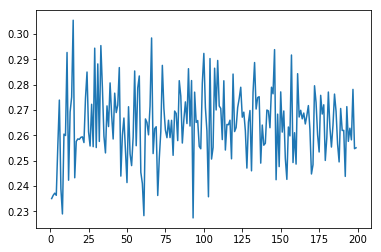

In [18]:
error = {}

for i in range(1, 200, 1):
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, ), random_state=1)
    clf.fit(X_train, y_train)
    error[i] = (abs(clf.predict(X_test) - y_test)).mean()
    
pd.Series(error).plot()
pd.Series(error).idxmin()

In [19]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 2), random_state=1)
clf.fit(X_train, y_train)
error = (abs(clf.predict(X_test) - y_test)).mean()

In [20]:
error

0.23631249490895817

In [21]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
clf.predict(X_test)

array([0.52937498, 0.52937498, 0.52937498, 0.52937498, 0.52937498,
       0.52937498, 0.52937498, 0.52937498, 0.52937498, 0.52937498,
       0.52937498, 0.52937498, 0.52937498, 0.52937498, 0.52937498,
       0.52937498, 0.52937498, 0.52937498, 0.52937498, 0.52937498])

In [23]:
y_test

1     0.02
4     0.05
5     0.06
13    0.14
14    0.15
17    0.18
22    0.23
31    0.32
32    0.33
40    0.41
42    0.43
46    0.47
50    0.51
52    0.53
55    0.56
58    0.59
59    0.60
75    0.76
86    0.87
93    0.94
Name: rank, dtype: float64